In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [14]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [15]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km\xb2),Density (P/Km\xb2)\r\nf87dea47db,Last session of the day  http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860,60\r\n96d74cb729, Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).,positive,noon,21-30,Albania,2877797,27400,105\r\neee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044,2381740,18\r\n01082688c6, happy bday!,positive,morning,46-60,Andorra,77265,470,164\r\n33987a8ee5, http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700,26\r\n726e501993, that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929,440,223\r\n261932614e,I THINK EVERYONE HATES ME ON HERE   lol,negative,morning,0-20,Argentina,45195774,2736690,17\r\nafa11da83f," soooooo wish i could, but im in school and myspace i

In [18]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [19]:
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [20]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [21]:
!kaggle datasets download -d abhishekshrivastava/sentiment-analysis-dataset

403 - Forbidden - Permission 'datasets.get' was denied


In [22]:
import pandas as pd

# Try loading the CSV with a different encoding
raw_data = pd.read_csv('/content/train.csv', encoding='ISO-8859-1')

# If you don't know the encoding, you could try 'latin1' or 'ISO-8859-1' first, then other options if needed
data = raw_data.copy()
data.head()


textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0               60  
1      Albania           2877797          27400.0              105  
2      Algeria          43851044        2381740.0               18  
3      Andorra             77265            470.0              164  
4       Angola          32866272        1246700.0               26

In [23]:
data.shape

(27481, 10)

In [24]:
data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [25]:
# Dropping columns that are not necessary (if any)
data.drop(columns=['textID'], inplace=True)


In [26]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, decide how to handle them. Example:
data.dropna(inplace=True)  # This drops rows with any missing values


text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [27]:
import re
import string

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the text and selected_text columns
data['text'] = data['text'].apply(clean_text)
data['selected_text'] = data['selected_text'].apply(clean_text)


In [28]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [29]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))


In [30]:
data.head()

text  \
0                  id have responded if i were going   
1         sooo sad i will miss you here in san diego   
2                             my boss is bullying me   
3                      what interview leave me alone   
4   sons of  why couldnt they put them on the rel...   

                       selected_text sentiment Time of Tweet Age of User  \
0  id have responded if i were going   neutral       morning        0-20   
1                           sooo sad  negative          noon       21-30   
2                        bullying me  negative         night       31-45   
3                     leave me alone  negative       morning       46-60   
4                           sons of   negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0               60  
1      Albania           2877797          27400.0              105  
2      Algeria          43851044        2381740.0               18  
3      Andorra             77265            470.0              164  
4       Angola          32866272        1246700.0               26

In [31]:
#EDA


In [32]:
data.head(n = 10)

text  \
0                  id have responded if i were going   
1         sooo sad i will miss you here in san diego   
2                             my boss is bullying me   
3                      what interview leave me alone   
4   sons of  why couldnt they put them on the rel...   
5    some shameless plugging for the best rangers...   
6  2am feedings for the baby are fun when he is a...   
7                                         soooo high   
8                                        both of you   
9   journey wow u just became cooler  hehe is tha...   

                                       selected_text sentiment Time of Tweet  \
0                  id have responded if i were going   neutral       morning   
1                                           sooo sad  negative          noon   
2                                        bullying me  negative         night   
3                                     leave me alone  negative       morning   
4                                           sons of   negative          noon   
5    some shameless plugging for the best rangers...   neutral         night   
6                                                fun  positive       morning   
7                                         soooo high   neutral          noon   
8                                        both of you   neutral         night   
9                           wow u just became cooler  positive       morning   

  Age of User              Country  Population -2020  Land Area (Km²)  \
0        0-20          Afghanistan          38928346         652860.0   
1       21-30              Albania           2877797          27400.0   
2       31-45              Algeria          43851044        2381740.0   
3       46-60              Andorra             77265            470.0   
4       60-70               Angola          32866272        1246700.0   
5      70-100  Antigua and Barbuda             97929            440.0   
6        0-20            Argentina          45195774        2736690.0   
7       21-30              Armenia           2963243          28470.0   
8       31-45            Australia          25499884        7682300.0   
9       46-60              Austria           9006398          82400.0   

   Density (P/Km²)  
0               60  
1              105  
2               18  
3              164  
4               26  
5              223  
6               17  
7              104  
8                3  
9              109

In [33]:
data.describe(include = "all")

text selected_text sentiment Time of Tweet Age of User  \
count               27480         27480     27480         27480       27480   
unique              27304         21002         3             3           6   
top     happy mothers day         happy   neutral       morning        0-20   
freq                   19           317     11117          9161        4581   
mean                  NaN           NaN       NaN           NaN         NaN   
std                   NaN           NaN       NaN           NaN         NaN   
min                   NaN           NaN       NaN           NaN         NaN   
25%                   NaN           NaN       NaN           NaN         NaN   
50%                   NaN           NaN       NaN           NaN         NaN   
75%                   NaN           NaN       NaN           NaN         NaN   
max                   NaN           NaN       NaN           NaN         NaN   

            Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
count         27480      2.748000e+04     2.748000e+04     27480.000000  
unique          195               NaN              NaN              NaN  
top     Afghanistan               NaN              NaN              NaN  
freq            149               NaN              NaN              NaN  
mean            NaN      4.018634e+07     6.621672e+05       357.699491  
std             NaN      1.504972e+08     1.807457e+06      2013.786207  
min             NaN      8.010000e+02     0.000000e+00         2.000000  
25%             NaN      1.968001e+06     2.281000e+04        35.000000  
50%             NaN      8.655535e+06     1.118900e+05        89.000000  
75%             NaN      2.843594e+07     5.279700e+05       214.000000  
max             NaN      1.439324e+09     1.637687e+07     26337.000000

In [34]:
# Check the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)


sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


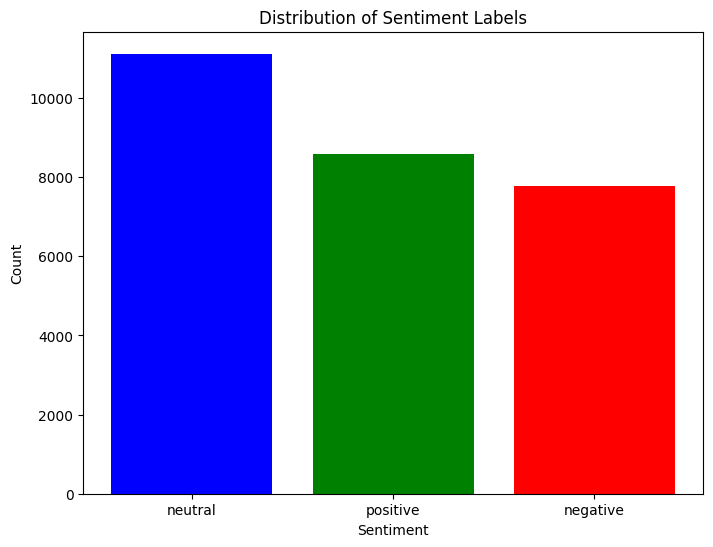

In [35]:
import matplotlib.pyplot as plt

# Plot a histogram of sentiment labels
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'green', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


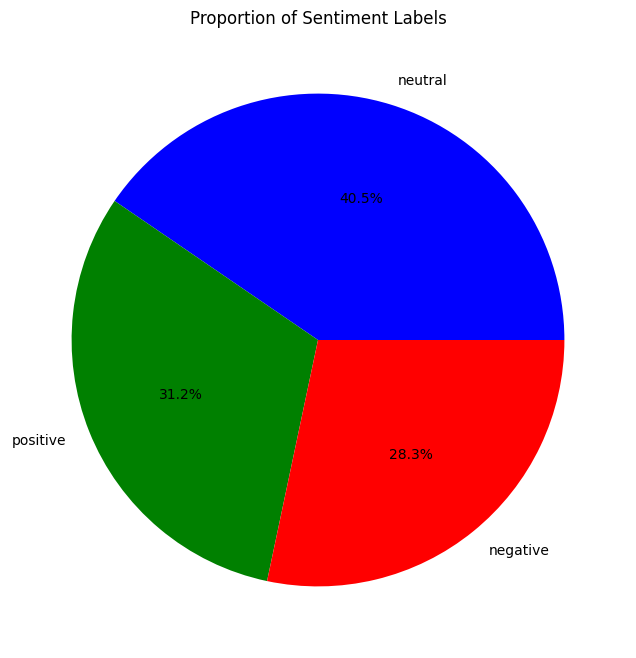

In [36]:
# Plot a pie chart of sentiment labels
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'])
plt.title('Proportion of Sentiment Labels')
plt.show()


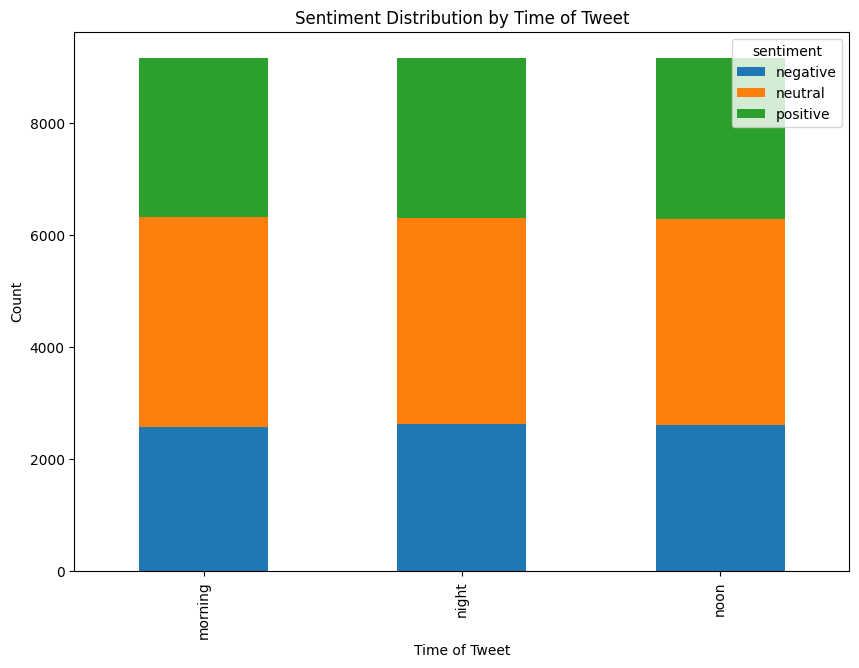

In [37]:
# Group by 'Time of Tweet' and 'sentiment' to see how sentiment varies across different times
time_sentiment = data.groupby(['Time of Tweet', 'sentiment']).size().unstack()

# Plot the distribution
time_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution by Time of Tweet')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.show()


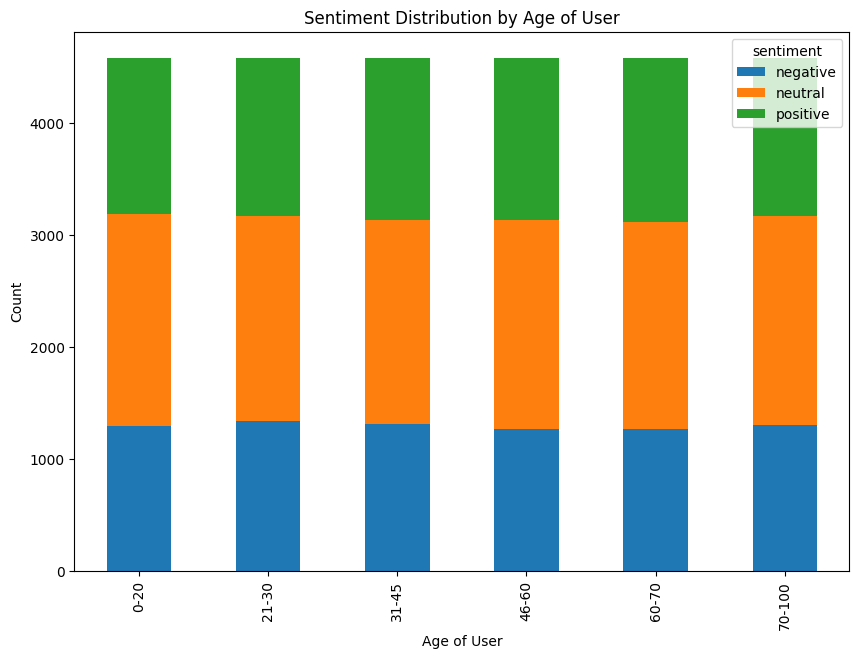

In [38]:
# Group by 'Age of User' and 'sentiment' to see how sentiment varies across different age groups
age_sentiment = data.groupby(['Age of User', 'sentiment']).size().unstack()

# Plot the distribution
age_sentiment.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution by Age of User')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.show()


In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


In [40]:
import pandas as pd

# Try different encodings if 'utf-8' fails
encodings = ['utf-8', 'latin-1', 'cp1252']

for encoding in encodings:
    try:
        data = pd.read_csv('test.csv', encoding=encoding)
        print(f"Successfully read with encoding: {encoding}")
        break  # Exit loop if reading is successful
    except UnicodeDecodeError:
        print(f"Failed with encoding: {encoding}")


Failed with encoding: utf-8
Successfully read with encoding: latin-1


In [41]:
Columns = ["textID", "Time of Tweet", "Age of User", "Country", "Population -2020", "Land Area (Km²)", "Density (P/Km²)"]
data.drop(columns = Columns, axis = 1, inplace = True)

In [42]:
data.head()

text sentiment
0  Last session of the day  http://twitpic.com/67ezh   neutral
1   Shanghai is also really exciting (precisely -...  positive
2  Recession hit Veronique Branquinho, she has to...  negative
3                                        happy bday!  positive
4             http://twitpic.com/4w75p - I like it!!  positive

In [43]:
Encoder = LabelEncoder()
data["sentiment"] = Encoder.fit_transform(data["sentiment"])

In [44]:
# Drop rows with NaN values in the 'text' column
data = data.dropna(subset=['text'])


In [45]:
# Replace NaN values with an empty string
data['text'] = data['text'].fillna('')


In [46]:
# Check if there are any NaN values in the 'text' column
print(data['text'].isna().sum())

# Replace NaN values with an empty string if any exist
data['text'] = data['text'].fillna('')


0


In [47]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(data["text"])

# Check our matrix shape
X.shape

(3534, 5000)

In [48]:
# Declaring our target variable
y = data["sentiment"]

In [49]:
Counter(y)

Counter({1: 1430, 2: 1103, 0: 1001})

In [50]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [51]:
Counter(y_final)

Counter({1: 1430, 2: 1430, 0: 1430})

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score



In [55]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model,X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.4833229301707719
Logistic Regression Test Accuracy: 0.5175621388902225
SVC Test Accuracy: 0.5025567772602871
Random Forest Test Accuracy: 0.5102071029592995
Naive Bayes Test Accuracy: 0.5002976904979113
K-Neighbors Test Accuracy: 0.359627726828956


In [66]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ValueError: Found input variables with inconsistent numbers of samples: [3, 3217]

In [57]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
accuracy_score(y_test, Prediction)

0.6150978564771669

In [62]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [63]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")

  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


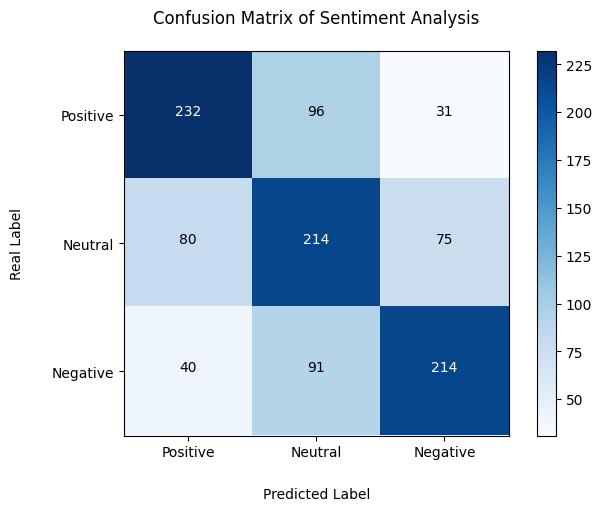

In [64]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

In [65]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       359
           1       0.53      0.58      0.56       369
           2       0.67      0.62      0.64       345

    accuracy                           0.62      1073
   macro avg       0.62      0.62      0.62      1073
weighted avg       0.62      0.62      0.62      1073



In [68]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Type of X_train: {type(X_train)}")
print(f"Type of y_train: {type(y_train)}")


Shape of X_train: (3, 3)
Shape of y_train: (3217,)
Type of X_train: <class 'numpy.ndarray'>
Type of y_train: <class 'pandas.core.series.Series'>
